<a href="https://colab.research.google.com/github/arihant-jain-09/AI-pothole-detection/blob/arihant/AI_pothole_detection(Image).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow-object-detection-api

# Imports

In [2]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [3]:
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile
import matplotlib.pyplot as plt

from collections import defaultdict
from io import StringIO
from PIL import Image

print(tf.__version__)

1.15.2


## Env setup

In [4]:
# This is needed to display the images.
%matplotlib inline

# This is needed since the notebook is stored in the object_detection folder.
sys.path.append("..")

## Object detection imports
Here are the imports from the object detection module.

In [5]:
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util

In [6]:
# Our Repo
!git clone https://github.com/arjun-710/AI-pothole-detection.git

fatal: destination path 'AI-pothole-detection' already exists and is not an empty directory.


In [7]:
%cd AI-pothole-detection/

/content/AI-pothole-detection


In [8]:
!ls

 generate_tfrecord.py   requirements.txt
 inference_graph       'Sample Train and Test Images with annotation data'
 labelmap.pbtxt        'TF Records'
 pothole_testImages     xml_to_csv.py
 README.md


# Model preparation for Faster RCNN

In [9]:
MODEL_NAME = 'inference_graph'
PATH_TO_CKPT = MODEL_NAME + '/frozen_inference_graph.pb'
PATH_TO_LABELS = 'labelmap.pbtxt'
NUM_CLASSES = 4

## Load a (frozen) Tensorflow model into memory.

In [10]:
detection_graph = tf.Graph()

with detection_graph.as_default():
    
    od_graph_def = tf.compat.v1.GraphDef()
    with tf.io.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')

## Loading label map

In [11]:
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)

## Helper code

In [12]:
def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

# Detection

In [13]:
PATH_TO_TEST_IMAGES_DIR = 'pothole_testImages'
TEST_IMAGE_PATHS = ['pothole_testImages/pothole1.jpg','pothole_testImages/pothole2.jpg','pothole_testImages/pothole3.jpg','pothole_testImages/pothole4.jpg','pothole_testImages/pothole5.jpg']
TEST_IMAGE_PATHS
# Size, in inches, of the output images.
IMAGE_SIZE = (10, 10)

In [14]:
with detection_graph.as_default():
  with tf.Session(graph=detection_graph) as session:
    # Definite input and output Tensors for detection_graph
    image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
    # Each box represents a part of the image where a particular object was detected.
    detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
    detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
    detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')
    num_detections = detection_graph.get_tensor_by_name('num_detections:0')
    for image_path in TEST_IMAGE_PATHS:
      image = Image.open(image_path)
      image_np = load_image_into_numpy_array(image)
      image_np_expanded = np.expand_dims(image_np, axis=0)
     
     # Actual detection.
      (boxes, scores, classes, num) = session.run(
          [detection_boxes, detection_scores, detection_classes, num_detections],
          feed_dict={image_tensor: image_np_expanded})
      
    # Visualization of the results of a detection.
      vis_util.visualize_boxes_and_labels_on_image_array(
          image_np,
          np.squeeze(boxes),
          np.squeeze(classes).astype(np.int32),
          np.squeeze(scores),
          category_index,
          use_normalized_coordinates=True,
          line_thickness=8)
      
      plt.figure(figsize=IMAGE_SIZE)
      # plt.imshow(image_np)
      img = Image.fromarray(image_np)
      img.save(image_path[:-4]+'_output_'+'.jpg')
      # plt.show()


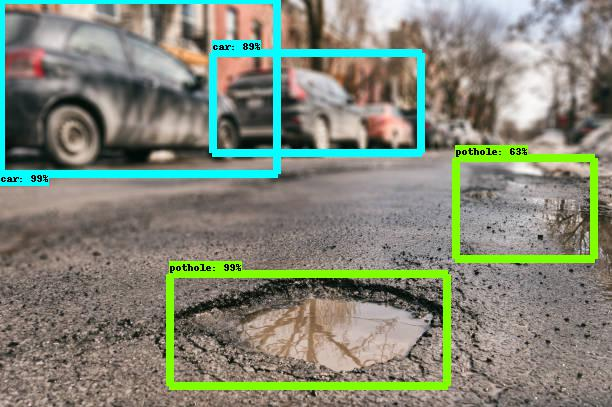

In [15]:
from IPython.display import Image, display
display(Image(image_path[:-4]+'_output_'+'.jpg'))